<a href="https://colab.research.google.com/github/ahmedyunis/Iris_dataset/blob/main/Iris_DataSetOneVRest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


#Function to Load Dataset (Iris dataset)
def loadDataset():
 dataset = datasets.load_iris() 
 features = dataset.data
 labels = dataset.target
 return dataset, features, labels

In [ ]:
#Function to remove class to plot one to one
def prepareDataset (X, y, cls_remove=None):
  cls = [0, 1, 2]

  if cls_remove is not None:
     features = []
     labels = []
     for index, (feat, label) in enumerate(zip(X, y)):
        if y[index] != cls_remove:
          features.append(feat)
          labels.append(label)
     cls.pop(cls_remove)
  else:
    features = X
    labels = y

  
  return np.array(features)[:, 2:4], np.array(labels), cls

In [ ]:
def label_binary(target, pos_cls):
  y=np.copy(target)
  if pos_cls == 0 :
    for i in range(len(y)):
     if y[i] ==0:
      y[i]=1
     else:
      y[i] = -1
  elif pos_cls == 1 :
    for i in range(len(y)):
     if y[i] == 1:
      y[i]=1
     else:
      y[i] = -1
  else:
    for i in range(len(y)):
     if y[i] ==2:
      y[i]=1
     else:
      y[i] = -1
  return y 


In [ ]:
lab = label_binary(labelss,pos_cls=2)

In [ ]:
lab

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#Function to Plot Data
def plotData(features, labels, cls, class_names):
 colors = ['r', 'b', 'g']
 markers = ['o', '*', '+']
 for class_index in range(len(cls)):
   plt.scatter(features[labels == cls[class_index], 0], features[labels ==cls[class_index], 1], c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])
 Title = "Iris Dataset with {n} classes" .format(n=int(len(cls)))
 plt.title(Title)
 plt.xlabel('Petal Length (cm)' )
 plt.ylabel('Petal width (cm)' )
 plt.legend()

In [ ]:
#Function to Plot Decision Boundary
def plotRegions(model):
 ax = plt.gca()
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 xx = np.linspace(xlim[ 0], xlim[1], 50)
 yy = np.linspace(ylim[ 0], ylim[1], 50)
 XX, YY = np.meshgrid(xx, yy)
 z = np.vstack([XX.ravel(), YY.ravel()]).T
 ZZ = model.decision_function(z) .reshape(XX.shape)
 ax.contourf(XX, YY, ZZ, colors=[ 'c','y'], levels=0, alpha=0.2)

In [ ]:
#Additional Functions
def getAccuracy(model, x, y):
 return model.score(x,y)* 100

def getClassNames (target_names):
 cls_all = {}
 for i, label in enumerate(target_names):
   cls_all[i] = label
 return cls_all

In [ ]:
dataset, features, labels = loadDataset()
class_names = getClassNames(dataset.target_names)
print('Class names=', class_names)
X, Y, cls_new = prepareDataset(features, labels, cls_remove=None)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print(cls_new)


Class names= {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Number of samples: 150
Number of features: 2
[0, 1, 2]


Accuracy of the model: 95.33


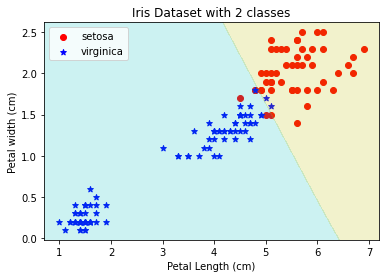


Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97       100
           1       0.96      0.90      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.94      0.95       150
weighted avg       0.95      0.95      0.95       150


Confusion Matrix:

[[98  2]
 [ 5 45]]


In [ ]:
#SVM and Plotting
y = label_binary(Y,pos_cls=0)

model = OneVsRestClassifier(SVC(decision_function_shape= 'ovr'))
model.fit(X, y)
print('Accuracy of the model: {:.2f}' .format(getAccuracy(model, X, y)))
plotData(X, y, [1,-1], {1: 'setosa', -1: 'versicolor', -1: 'virginica'})

plotRegions(model)
plt.show()

#Stats
y_true, y_pred = y, model.predict(X)
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(y, y_pred))

Accuracy of the model: 95.33


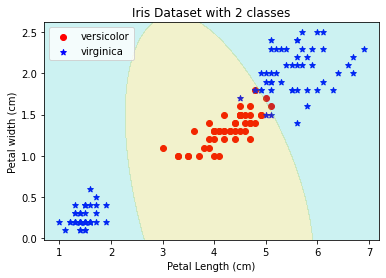


Classification Report:

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       100
           1       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.94      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


Confusion Matrix:

[[95  5]
 [ 2 48]]


In [ ]:
y = label_binary(Y,pos_cls=1)


model = OneVsRestClassifier(SVC(decision_function_shape= 'ovr'))
model.fit(X, y)
print('Accuracy of the model: {:.2f}' .format(getAccuracy(model, X, y)))
plotData(X, y, [1,-1], {-1: 'setosa', 1: 'versicolor', -1: 'virginica'})

plotRegions(model)
plt.show()

#Stats
y_true, y_pred = y, model.predict(X)
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(y, y_pred))

Accuracy of the model: 95.33


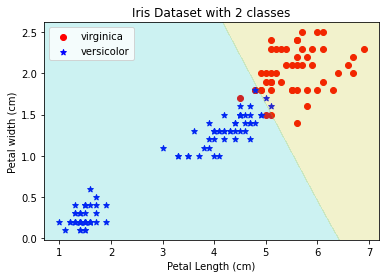


Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97       100
           1       0.96      0.90      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.94      0.95       150
weighted avg       0.95      0.95      0.95       150


Confusion Matrix:

[[98  2]
 [ 5 45]]


In [ ]:
y = label_binary(Y,pos_cls=2)


model = OneVsRestClassifier(SVC(decision_function_shape= 'ovr'))
model.fit(X, y)
print('Accuracy of the model: {:.2f}' .format(getAccuracy(model, X, y)))
plotData(X, y, [1,-1], {-1: 'setosa', -1: 'versicolor', 1: 'virginica'})

plotRegions(model)
plt.show()

#Stats
y_true, y_pred = y, model.predict(X)
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(y, y_pred))

Accuracy of the model: 100.00


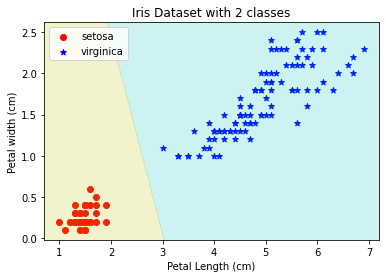


Classification Report:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Confusion Matrix:

[[100   0]
 [  0  50]]


In [ ]:
#LogisticRegression

y = label_binary(Y,pos_cls=0)

model = OneVsRestClassifier(LogisticRegression(multi_class='ovr'))
model.fit(X, y)
print('Accuracy of the model: {:.2f}' .format(getAccuracy(model, X, y)))
plotData(X, y, [1,-1], {1: 'setosa', -1: 'versicolor', -1: 'virginica'})

plotRegions(model)
plt.show()

#Stats
y_true, y_pred = y, model.predict(X)
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(y, y_pred))


Accuracy of the model: 60.00


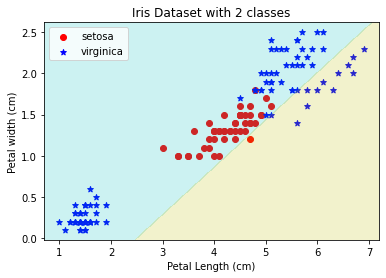


Classification Report:

              precision    recall  f1-score   support

          -1       0.64      0.89      0.75       100
           1       0.08      0.02      0.03        50

    accuracy                           0.60       150
   macro avg       0.36      0.46      0.39       150
weighted avg       0.46      0.60      0.51       150


Confusion Matrix:

[[89 11]
 [49  1]]


In [ ]:
#LogisticRegression

y = label_binary(Y,pos_cls=1)

model = OneVsRestClassifier(LogisticRegression(multi_class='ovr'))
model.fit(X, y)
print('Accuracy of the model: {:.2f}' .format(getAccuracy(model, X, y)))
plotData(X, y, [1,-1], {1: 'setosa', -1: 'versicolor', -1: 'virginica'})

plotRegions(model)
plt.show()

#Stats
y_true, y_pred = y, model.predict(X)
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(y, y_pred))


Accuracy of the model: 96.67


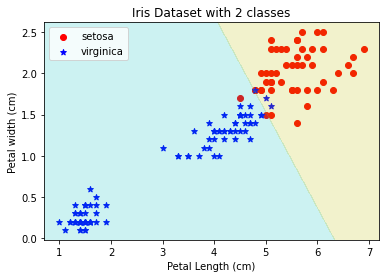


Classification Report:

              precision    recall  f1-score   support

          -1       0.98      0.97      0.97       100
           1       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150


Confusion Matrix:

[[97  3]
 [ 2 48]]


In [ ]:
#LogisticRegression

y = label_binary(Y,pos_cls=2)

model = OneVsRestClassifier(LogisticRegression(multi_class='ovr'))
model.fit(X, y)
print('Accuracy of the model: {:.2f}' .format(getAccuracy(model, X, y)))
plotData(X, y, [1,-1], {1: 'setosa', -1: 'versicolor', -1: 'virginica'})

plotRegions(model)
plt.show()

#Stats
y_true, y_pred = y, model.predict(X)
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(y, y_pred))
